In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
path = r"C:\Users\gonza\Downloads\creditcard.csv\creditcard.csv"
df = pd.read_csv(path,header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [11]:
columns_names =["Time"] + ["v"+str(i) for i in range(1,29)] + ["Amount","Class"]

In [13]:
df.columns = columns_names  

In [14]:
df.head(3)

,Time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


(array([2.84395e+05, 3.60000e+02, 3.60000e+01, 1.00000e+01, 2.00000e+00,
        1.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0.   ,  2569.116,  5138.232,  7707.348, 10276.464, 12845.58 ,
        15414.696, 17983.812, 20552.928, 23122.044, 25691.16 ]),
 <a list of 10 Patch objects>)

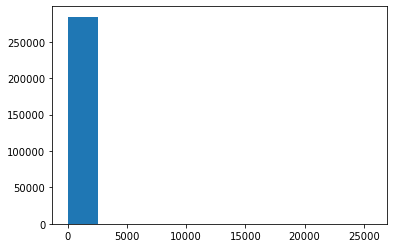

In [17]:
plt.hist(df["Amount"])

In [18]:
df["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [20]:
df.Class.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [21]:
df_uno = df[df["Class"] == 1]

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
models = [("rdf",RandomForestClassifier(max_depth=2, random_state=0)),("dct",DecisionTreeClassifier(random_state=0)),("lg",LogisticRegression(random_state=0)),("gas",GaussianNB()),("svc",SVC(kernel="linear",probability=True)),("kn",KNeighborsClassifier(n_neighbors=2))]




In [29]:
from sklearn.model_selection import train_test_split
X = df.drop("Class",axis=1)
y = df.Class
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,stratify=y,test_size=0.4)

In [33]:
from sklearn.metrics import precision_recall_curve
# evaluate model
model = []
name = []
scores = []
for i,x in models:
    modelo = x.fit(X_train,y_train)
    #predict_proba
    predict = modelo.predict_proba(X_test)
    predict = predict[:,1]
    #score
    score = precision_recall_curve(y_test,predict)
    # append
    model.append(x)
    name.append(i)
    scores.append(score)